In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

Load dataset from .csv file

In [61]:
dataset = pd.read_csv("data.csv", encoding='latin-1')

In [62]:
print(dataset.shape)
dataset = dataset.drop(columns = ['Museum', 'Subspecies',  'Elevation', 'Species.1', 'Museum.1', '[H]a', 'Preparation', 'Unnamed: 76', 'State/Province', 'Region', 'Locality', 'Species.2', 'Museum.2', 'Specimen_Number.1',  'Isotope_Samp_ID'], axis = 1)
dataset = dataset.dropna()

(439, 80)


In [63]:
print(dataset)

     Specimen _Number        Species  Clade      Sex  Body Mass (g)  \
59           608512.0  albidiventris  Small     Male           34.0   
125          609498.0    albiventris  Small   Female           28.3   
146          793177.0    atacamensis  Large   female           49.0   
147          798897.0    atacamensis  Large   female           54.7   
204          814047.0      excelsior  Large   female           65.0   
225          779487.0         fuscus  Small     male           28.4   
226          779488.0         fuscus  Small     male           31.3   
227          779489.0         fuscus  Small     male           29.3   
228          779490.0         fuscus  Small     male           31.3   
229          779491.0         fuscus  Small   female           26.2   
230          779492.0         fuscus  Small   female           27.1   
231          779493.0         fuscus  Small   female           30.3   
278          485619.0         fuscus  Small   Female           31.0   
279   

Replace character data with numbers

In [64]:
def words_to_numeric(data):
    num = 0
    count = 0
    types_dict = {}
    for el in data:
        el = el.lower()
        if el not in types_dict:
            types_dict[(el.lower())] = num
            num += 1
        count += 1
    return types_dict

def change_dataset():
    dataset['Sex'] = dataset['Sex'].apply(lambda x: sex_dict[x.lower()])

In [65]:
to_change_list = ('Sex', 'Clade', 'Country')
for name in to_change_list:
    new_data =  words_to_numeric(dataset[name])
    print(new_data)
    dataset[name] = dataset[name].apply(lambda x: new_data[x.lower()])

{'male': 0, 'female': 1, 'unknown': 2}
{'small': 0, 'large': 1}
{'ecuador': 0, 'argentina': 1, 'bolivia': 2, 'peru': 3, 'columbia': 4, 'chile': 5}


## Analysis of initial data
let's build some comparative graphs

Text(0.5, 1.0, 'Species')

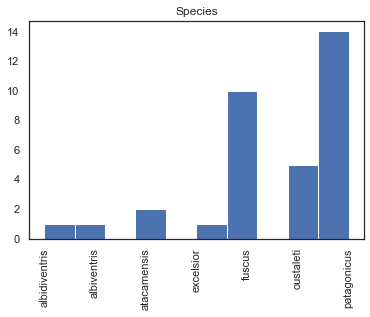

In [66]:
fig, axs = plt.subplots(1, 1)
axs.hist(dataset['Species'], bins=10)
plt.xticks(rotation=90)
axs.set_title('Species')

In [67]:
features = dataset.columns[2:8]
print(features)

fig = px.scatter_matrix(
    dataset,
    dimensions=features,
    color="Species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

Index(['Clade', 'Sex', 'Body Mass (g)', 'Body _Length _(mm)',
       'Head _Length _(mm)', 'Bill Length (mm)'],
      dtype='object')


In [68]:
features = dataset.columns
features = features.drop('Species',1)
print(features)

pca = PCA()
components = pca.fit_transform(dataset[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=dataset["Species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Index(['Specimen _Number', 'Clade', 'Sex', 'Body Mass (g)',
       'Body _Length _(mm)', 'Head _Length _(mm)', 'Bill Length (mm)',
       'Bill Width1 (mm)', 'Bill Width2 (mm)', 'Bill Width3 (mm)',
       'Bill Depth1 (mm)', 'Bill Depth2 (mm)', 'Bill Depth3 (mm)',
       'Proximal Bill Cross-Sectional_ Area (mm2)',
       'Mid-Length Bill Cross-Sectional Area (mm2)',
       'Distal Bill Cross-Sectional Area (mm2)', 'Wing Length (mm)',
       'Primary 1 (mm)', 'Primary 2 (mm)', 'Primary 3 (mm)', 'Primary 4 (mm)',
       'Primary 5 (mm)', 'Primary 6 (mm)', 'Primary 7 (mm)', 'Primary 8 (mm)',
       'Primary 9 (mm)', 'Width of Primary 1', 'Width of Primary 9',
       'Tibiotarsus Width (mm)', 'Tarsometatarsus Length (mm)',
       'Tarsometatarsus Width (mm)', 'Digit 1 (mm)', 'Digit 2 (mm)',
       'Digit 3 (mm)', 'Digit 4 (mm)', 'Ungual 1 (mm)', 'Ungual 2 (mm)',
       'Ungual 3 (mm)', 'Ungual 4 (mm)', 'Central rectrix (mm)',
       'Lateral Retrices', 'Isometric Size Index', 'Wing Pointe

In [69]:
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(dataset[features])

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=dataset["Species"],
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [70]:
features = dataset.columns
features = features.drop('Species',1)
X =  dataset[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=dataset['Species'])
fig.show()

In [71]:
pca = PCA()
pca.fit(dataset[features])
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

     Specimen _Number  Clade  Sex  Body Mass (g)  Body _Length _(mm)  \
59           608512.0      0    0           34.0               174.0   
125          609498.0      0    1           28.3               169.0   
146          793177.0      1    1           49.0               202.0   
147          798897.0      1    1           54.7               204.0   
204          814047.0      1    1           65.0               211.0   
225          779487.0      0    0           28.4               179.0   
226          779488.0      0    0           31.3               201.0   
227          779489.0      0    0           29.3               186.0   
228          779490.0      0    0           31.3               189.0   
229          779491.0      0    1           26.2               183.0   
230          779492.0      0    1           27.1               181.0   
231          779493.0      0    1           30.3               198.0   
278          485619.0      0    1           31.0               1

KeyError: 0

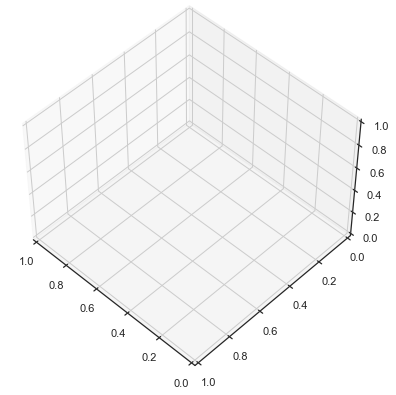

In [73]:

# Загрузим наши ириски
X = dataset[features]
print(X)
y = dataset['Species']

# Заведём красивую трёхмерную картинку
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [(y[0], 0), (y[1], 1), (y[2], 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [74]:
print(dataset)

     Specimen _Number        Species  Clade  Sex  Body Mass (g)  \
59           608512.0  albidiventris      0    0           34.0   
125          609498.0    albiventris      0    1           28.3   
146          793177.0    atacamensis      1    1           49.0   
147          798897.0    atacamensis      1    1           54.7   
204          814047.0      excelsior      1    1           65.0   
225          779487.0         fuscus      0    0           28.4   
226          779488.0         fuscus      0    0           31.3   
227          779489.0         fuscus      0    0           29.3   
228          779490.0         fuscus      0    0           31.3   
229          779491.0         fuscus      0    1           26.2   
230          779492.0         fuscus      0    1           27.1   
231          779493.0         fuscus      0    1           30.3   
278          485619.0         fuscus      0    1           31.0   
279          485622.0         fuscus      0    0           34.

Process data to remove string columns and rows with NaN elements

In [75]:
lol = dataset['Species']
print(lol)

59     albidiventris
125      albiventris
146      atacamensis
147      atacamensis
204        excelsior
225           fuscus
226           fuscus
227           fuscus
228           fuscus
229           fuscus
230           fuscus
231           fuscus
278           fuscus
279           fuscus
280           fuscus
333        oustaleti
334        oustaleti
335        oustaleti
336        oustaleti
339        oustaleti
352      patagonicus
397      patagonicus
398      patagonicus
399      patagonicus
400      patagonicus
401      patagonicus
402      patagonicus
404      patagonicus
405      patagonicus
406      patagonicus
407      patagonicus
408      patagonicus
409      patagonicus
410      patagonicus
Name: Species, dtype: object


In [76]:
import plotly.express as px

features = dataset.columns[:4]
print(features)
#features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    dataset,
    dimensions=features,
    color="color"
)
fig.update_traces(diagonal_visible=False)
fig.show()

Index(['Specimen _Number', 'Species', 'Clade', 'Sex'], dtype='object')


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Specimen _Number', 'Species', 'Clade', 'Sex', 'Body Mass (g)', 'Body _Length _(mm)', 'Head _Length _(mm)', 'Bill Length (mm)', 'Bill Width1 (mm)', 'Bill Width2 (mm)', 'Bill Width3 (mm)', 'Bill Depth1 (mm)', 'Bill Depth2 (mm)', 'Bill Depth3 (mm)', 'Proximal Bill Cross-Sectional_ Area (mm2)', 'Mid-Length Bill Cross-Sectional Area (mm2)', 'Distal Bill Cross-Sectional Area (mm2)', 'Wing Length (mm)', 'Primary 1 (mm)', 'Primary 2 (mm)', 'Primary 3 (mm)', 'Primary 4 (mm)', 'Primary 5 (mm)', 'Primary 6 (mm)', 'Primary 7 (mm)', 'Primary 8 (mm)', 'Primary 9 (mm)', 'Width of Primary 1', 'Width of Primary 9', 'Tibiotarsus Width (mm)', 'Tarsometatarsus Length (mm)', 'Tarsometatarsus Width (mm)', 'Digit 1 (mm)', 'Digit 2 (mm)', 'Digit 3 (mm)', 'Digit 4 (mm)', 'Ungual 1 (mm)', 'Ungual 2 (mm)', 'Ungual 3 (mm)', 'Ungual 4 (mm)', 'Central rectrix (mm)', 'Lateral Retrices', 'Isometric Size Index', 'Wing Pointedness Index', 'Wing Convexity Index', 'Country', 'Latitute (o South)', 'Longitude (o West)', 'Elevation1', 'Prin1 2', 'Prin2 2', 'Prin3 2', 'Prin4 2', 'Prin5 2', 'Specimen_Number', 'D15N', 'D13C', 'Prct_Nitrogen', 'Prct_Carbon', 'C_N_Ratio', ' ?18O', 'dDa', 'dDb', '[H]b', 'Mean_dD'] but received: color

Standartize values for correct work of algorithm

In [77]:
dataset = StandardScaler().fit_transform(dataset)

ValueError: could not convert string to float: 'albidiventris'

In [78]:
print(dataset.shape)

(34, 65)


Use PCA from sklearn.decomposition with 95% information contetnt from original data

In [79]:
pca = PCA(.95)
principalComponents = pca.fit_transform(dataset)
principalDf = pd.DataFrame(data = principalComponents)

print(principalDf)

ValueError: could not convert string to float: 'albidiventris'

In [19]:
principalDf.plot()

NameError: name 'principalDf' is not defined

In [20]:
features = principalDf.columns[:6]
print(features)
#features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    dataset,
    dimensions=features,
)
fig.update_traces(diagonal_visible=False)
fig.show()

NameError: name 'principalDf' is not defined

Percentage of variance explained by each of the selected components

In [21]:
print(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'